# 2-way ANOVA in R (between-subject factors)
We will start with the 2-way between-subjects ANOVA, which can be conducted with the R package `lm`. We can also access the underlying model matrix and inspect it to verify that the same model is applied in both Python and R. Similar as in Patsy, we can also change the coding scheme for the categorical factors.

In [1]:
# ! R code now, not Python!

library(readr)

# read in data from 2-way ANOVA with between-subject factors
df_2way <- read_csv("df_2way.csv")
# fit linear model and get parameter estimates
model_fit <- lm(my_value ~ group * language, df_2way)

# display anova table
anova(model_fit)
# display results of linear regression
summary(model_fit)

Parsed with column specification:
cols(
  group = col_character(),
  language = col_character(),
  my_value = col_double()
)



,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
group,2,46.585744,23.2928720,27.45006,7.911130e-10
language,2,63.784731,31.8923655,37.58435,2.838481e-12
group:language,4,6.750387,1.6875967,1.98879,1.039990e-01
Residuals,81,68.732903,0.8485544,NA,NA



Call:
lm(formula = my_value ~ group * language, data = df_2way)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8680 -0.6640  0.1173  0.5952  2.5528 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -0.31684    0.29130  -1.088   0.2800    
grouppatient1                 0.54840    0.41196   1.331   0.1869    
grouppatient2                 2.04575    0.41196   4.966 3.73e-06 ***
languageFrench                2.14408    0.41196   5.205 1.44e-06 ***
languageGerman                0.83813    0.41196   2.034   0.0452 *  
grouppatient1:languageFrench  0.64535    0.58260   1.108   0.2713    
grouppatient2:languageFrench -0.89227    0.58260  -1.532   0.1295    
grouppatient1:languageGerman  0.64412    0.58260   1.106   0.2722    
grouppatient2:languageGerman  0.03082    0.58260   0.053   0.9579    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9212 on 81 degrees of freedom
M

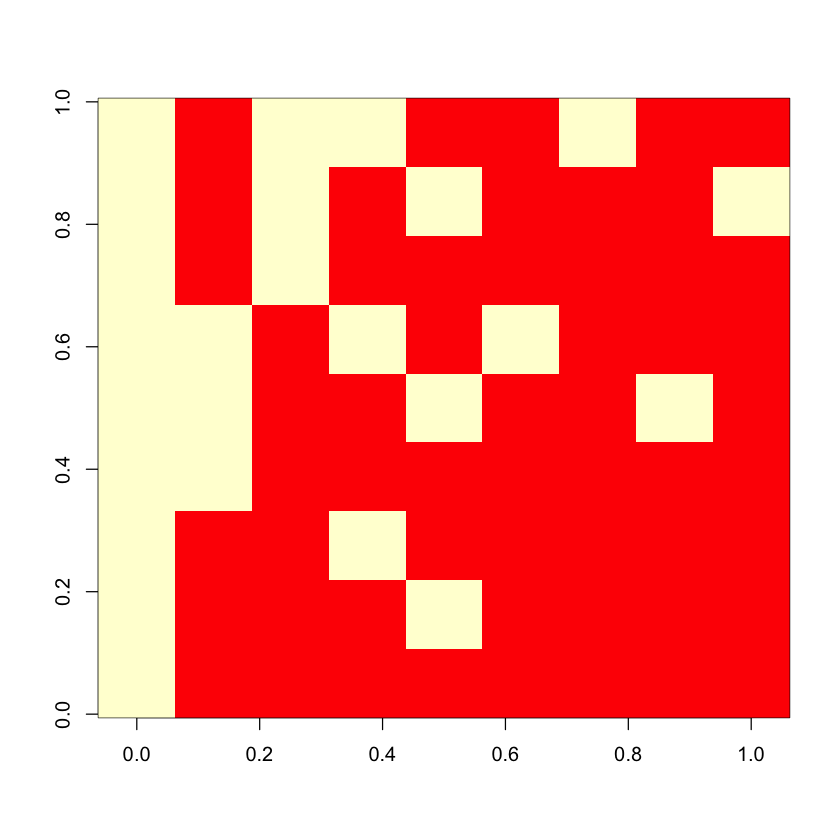

In [2]:
# access underlying model
my_glm = model.matrix(model_fit)
# inspect GLM
image(t(my_glm))

In [3]:
# change coding scheme
model_fit <- lm(my_value ~ group * language, df_2way, contrasts = list(group = "contr.sum", language = "contr.sum"))
# display anova table
anova(model_fit)
# display results of linear regression
summary(model_fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
group,2,46.585744,23.2928720,27.45006,7.911130e-10
language,2,63.784731,31.8923655,37.58435,2.838481e-12
group:language,4,6.750387,1.6875967,1.98879,1.039990e-01
Residuals,81,68.732903,0.8485544,NA,NA



Call:
lm(formula = my_value ~ group * language, data = df_2way, contrasts = list(group = "contr.sum", 
    language = "contr.sum"))

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8680 -0.6640  0.1173  0.5952  2.5528 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.58950    0.09710  16.370  < 2e-16 ***
group1           -0.91227    0.13732  -6.643 3.26e-09 ***
group2            0.06595    0.13732   0.480   0.6323    
language1        -1.04163    0.13732  -7.585 4.90e-11 ***
language2         1.02015    0.13732   7.429 9.91e-11 ***
group1:language1  0.04756    0.19420   0.245   0.8072    
group2:language1 -0.38227    0.19420  -1.968   0.0524 .  
group1:language2  0.12986    0.19420   0.669   0.5056    
group2:language2  0.34539    0.19420   1.779   0.0791 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9212 on 81 degrees of freedom
Multiple R-squared:  0.6302,	Adjusted R-squared:  0.5

# 4-way ANOVA in R (between-subject and within-subject factors)
In a very similar fashion, we can perform an ANOVA that includes within-subject factors and random effects. In this case we use the `lme4` package.

In [4]:
library(lme4)
library(lmerTest)
library(readr)

# read in data from 4-way ANOVA with between-subject and within-subject factors
df_full <- read_csv("df_full.csv")

# get parameter estimates from a linear regression with random effects
my_model_fit <- lmer(my_value ~ group * language * task * condition + (1|sub_id), df_full)
# display results of linear regression
summary(my_model_fit)


Warning message:
“package ‘lme4’ was built under R version 3.5.2”
Loading required package: Matrix

Warning message:
“package ‘lmerTest’ was built under R version 3.5.2”

Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step


Parsed with column specification:
cols(
  group = col_character(),
  language = col_character(),
  sub_id = col_double(),
  task = col_character(),
  condition = col_character(),
  my_value = col_double()
)


Correlation matrix not shown by default, as p = 54 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: my_value ~ group * language * task * condition + (1 | sub_id)
   Data: df_full

REML criterion at convergence: 1507.2

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.90506 -0.63492 -0.01991  0.63309  2.96099 

Random effects:
 Groups   Name        Variance Std.Dev.
 sub_id   (Intercept) 0.008599 0.09273 
 Residual             0.999202 0.99960 
Number of obs: 540, groups:  sub_id, 90

Fixed effects:
                                                     Estimate Std. Error
(Intercept)                                           0.99426    0.31746
grouppatient1                                        -0.16761    0.44895
grouppatient2                                         0.09103    0.44895
languageFrench                                        0.33475    0.44895
languageGerman                                       -0.15014    0.44895
tasktask2                                   

In [5]:
# main and interaction effects
anova(my_model_fit)
# random effects
rand(my_model_fit)

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
group,1.6603036,0.8301518,2,81.0407,0.8308147,4.393706e-01
language,1.9710372,0.9855186,2,81.0407,0.9863055,3.773836e-01
task,367.6811701,183.8405850,2,405.0506,183.9873818,1.426573e-57
condition,118.4001814,118.4001814,1,405.0506,118.4947240,2.220945e-24
group:language,10.8603366,2.7150841,4,81.0407,2.7172521,3.532210e-02
group:task,3.0990351,0.7747588,4,405.0506,0.7753774,5.416750e-01
language:task,2.0196072,0.5049018,4,405.0506,0.5053050,7.318662e-01
group:condition,0.9371370,0.4685685,2,405.0506,0.4689427,6.260027e-01
language:condition,0.6095332,0.3047666,2,405.0506,0.3050099,7.372852e-01


,npar,logLik,AIC,LRT,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,56,-753.6189,1619.238,NA,NA,NA
(1 | sub_id),55,-753.6621,1617.324,0.0862481,1,0.7690022


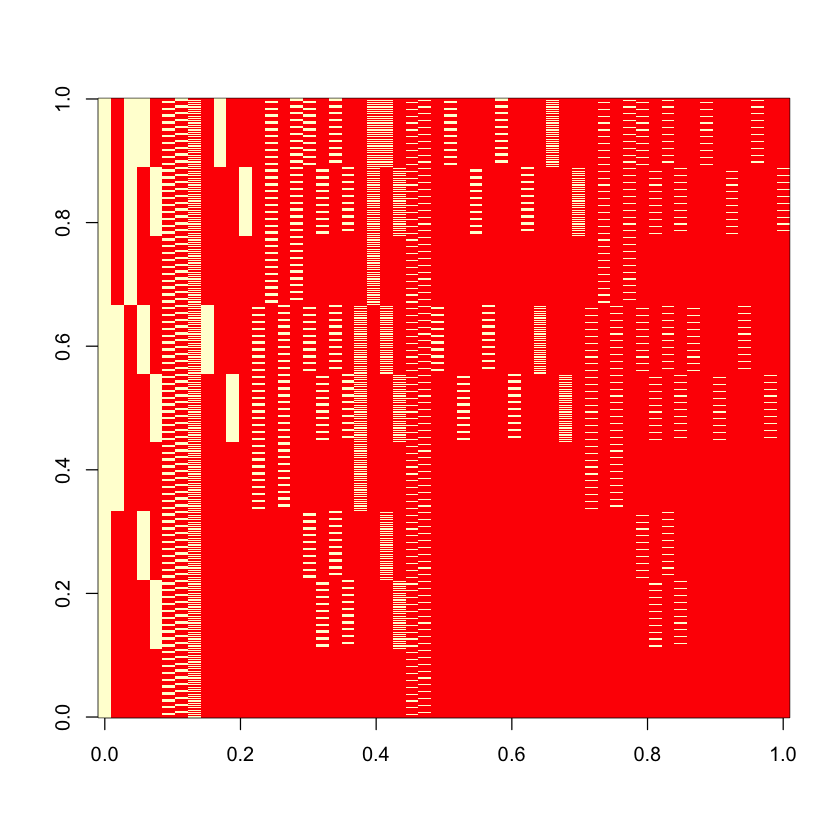

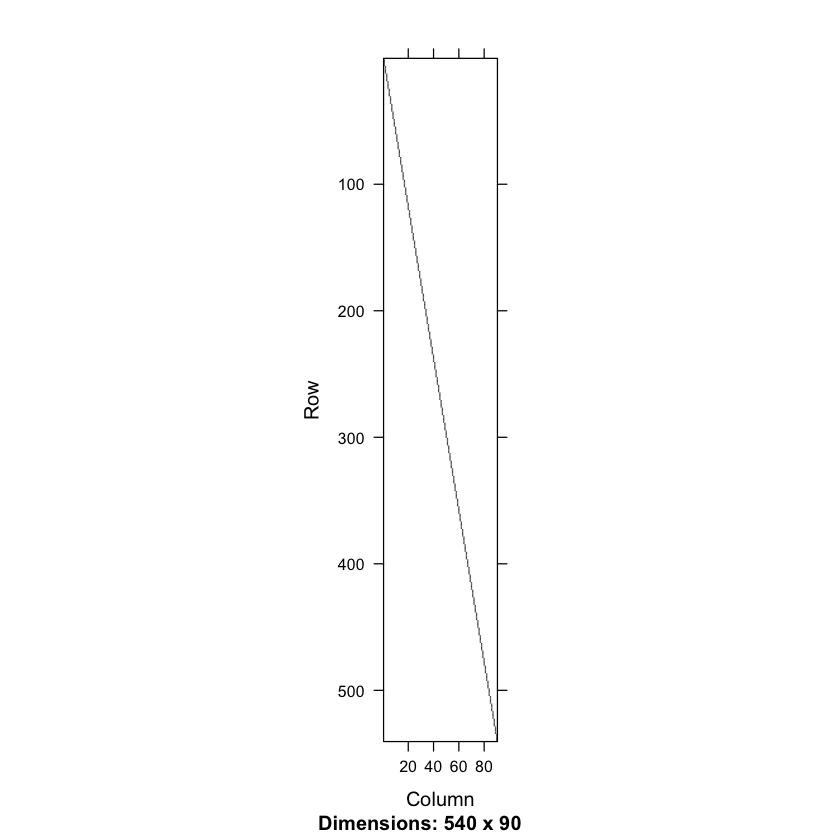

In [6]:
# access underlying model for fixed effects
my_glm_fe = model.matrix(my_model_fit)
# access underlying model for random effects
my_glm_re = getME(my_model_fit, "Zt")
# inspect matrices
image(t(my_glm_fe))
image(t(my_glm_re))

# That's it!
As concluding remark, I would like to encourage you to build the model matrix for your ANOVA by hand and to compare it to the automatic matrix generation in Patsy using different coding schemes. General linear models are a powerful statistical tool that is widely used in psychological and neuroimaging data analysis, so it's worth wrapping your head around the underlying principles. Below, I post some links that I found useful when preparing this tutorial.

Thanks for reading this post :-)

Nicole

### Useful links:
* [Coding schemes for categorical factors](https://stats.idre.ucla.edu/spss/faq/coding-systems-for-categorical-variables-in-regression-analysis-2/)
* [Python vs. R](https://medium.com/@data_driven/python-vs-r-for-data-science-and-the-winner-is-3ebb1a968197)
* [Repeated-measures ANOVA in Python](https://www.marsja.se/repeated-measures-anova-using-python/)
* [Statsmodels mixedlm and lme4](https://www.statsmodels.org/stable/examples/notebooks/generated/mixed_lm_example.html)

